# CatBoost

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from fastbook import *
import matplotlib.pyplot as plt
import seaborn as sns
import os

# PATH = "/Users/luanagiusto/TP-1-ML"  # Cambia esto si tu path es diferente
PATH = "C:/Users/julia/ML_TP"

In [21]:
def fit_transform_cb(X, y, cat_features=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    cb = CatBoostClassifier(
        iterations=100,
        depth=10,
        learning_rate=0.1,
        eval_metric='AUC',
        random_seed=42,
        verbose=False
    )

    cb.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val), use_best_model=True)

    proba = cb.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, proba)
    return cb, auc, proba

In [25]:
def plot_feature_importance(cb, X, top_k=20, model_name="CatBoost"):
    imp = pd.Series(cb.feature_importances_, index=X.columns).sort_values(ascending=False)
    top = imp.head(top_k)[::-1]  

    plt.figure(figsize=(8, max(4, top_k * 0.4)))
    top.plot(kind="barh", color="steelblue", edgecolor="black")
    plt.title(f"Importancia de Features ({model_name}) - Top {top_k}")
    plt.xlabel("Importancia relativa")
    plt.tight_layout()
    plt.show()

    return imp


In [23]:
# Cargar datos
df = pd.read_parquet(os.path.join(PATH, 'prework_output.parquet'))

# Separar features y target
xs = df.drop(columns='target')
y = df['target']

# Detectar columnas categóricas automáticamente
cat_features = xs.select_dtypes(include='object').columns.tolist()

# Entrenar y evaluar
cb, auc, proba = fit_transform_cb(xs, y, cat_features=cat_features)
print(f"ROC-AUC (validación): {auc:.6f}")


ROC-AUC (validación): 0.778195


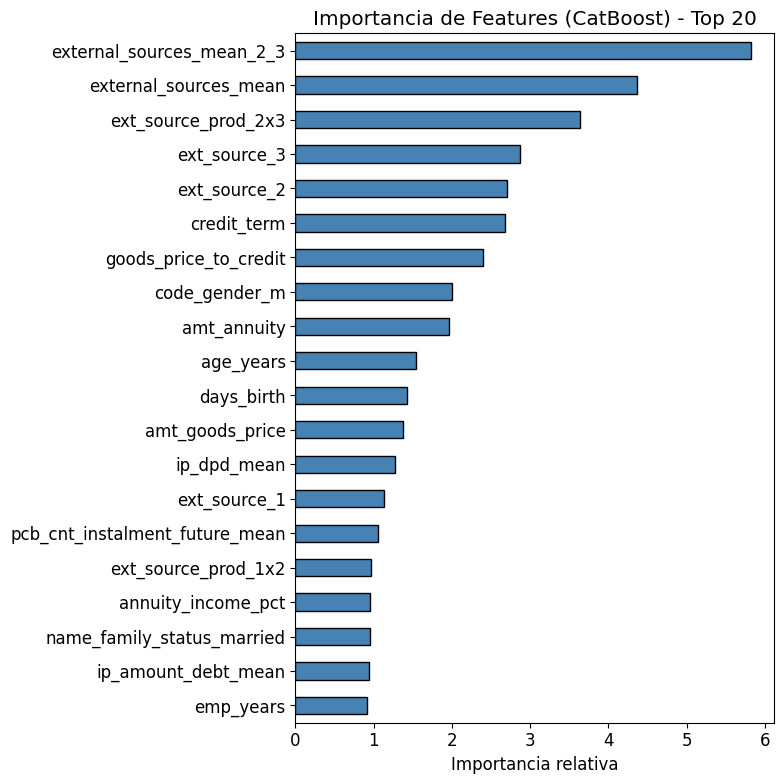

In [26]:
# Calcular y graficar importancias de features
imp = plot_feature_importance(cb, xs, top_k=20, model_name="CatBoost")